In [298]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.model_selection import train_test_split
import requests

In [297]:
#!pip install tensorflow
#install tensorflow if you dont have it
#!pip install requests

In [ ]:
url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
response = requests.get(url)

with open("helper_functions.py", "w") as file:
    file.write(response.text)

# Step 3: Import the downloaded file as a module
import helper_functions as hf

# Example usage
# hf.some_function()

In [188]:
file_path = "C:/Users/RANJITH SHETTY N/Desktop/Machine-learning-project-on-heart-disease/credit_data/data.csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(df.head())
else:
    print(f"File not found: {file_path}")

C:\Users\RANJITH SHETTY N\AppData\Local\Temp\ipykernel_26400\3217132289.py:3: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ... il_util open_rv_12m open_rv_24m  \
0     10.65       162.87     B        B2  ...     NaN         NaN         NaN   
1     15.27        59.83     C        C4  ...     NaN         NaN         NaN   
2     15.96        84.33     C        C5  ...     NaN         NaN         NaN   
3     13.49       339.31     C        C1  ...     NaN         NaN         NaN   
4     12.69        67.79     B        B5  ...     NaN         NaN         NaN   

   max_bal_bc all_util total_rev_hi_lim inq_

## Data Discovery And Data preprocessing

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [190]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [191]:
#full form of each columns
"""


id: Unique Identifier for each loan record
member_id: Unique Identifier for each borrower/member
loan_amnt: Loan Amount
funded_amnt: Funded Amount
funded_amnt_inv: Funded Amount by Investors
term: Loan Term (e.g., 36 months, 60 months)
int_rate: Interest Rate
installment: Installment Amount
grade: Loan Grade
sub_grade: Loan Sub-Grade
emp_title: Employment Title
emp_length: Employment Length
home_ownership: Home Ownership Status
annual_inc: Annual Income
verification_status: Verification Status of Income
issue_d: Loan Issue Date
pymnt_plan: Payment Plan Indicator
desc: Loan Description
purpose: Purpose of the Loan
title: Loan Title
zip_code: Borrower's Zip Code
addr_state: Borrower's State
dti: Debt-to-Income Ratio
delinq_2yrs: Number of Delinquencies in the Last 2 Years
earliest_cr_line: Date of the Earliest Credit Line
inq_last_6mths: Number of Inquiries in the Last 6 Months
mths_since_last_delinq: Months Since the Last Delinquency
mths_since_last_record: Months Since the Last Public Record
open_acc: Number of Open Credit Accounts
pub_rec: Number of Public Records
revol_bal: Revolving Balance
revol_util: Revolving Line Utilization Rate
total_acc: Total Number of Credit Accounts
initial_list_status: Initial Listing Status
out_prncp: Outstanding Principal Amount
out_prncp_inv: Outstanding Principal Amount for Investors
total_pymnt: Total Payment Amount
total_pymnt_inv: Total Payment Amount for Investors
total_rec_prncp: Total Principal Received
total_rec_int: Total Interest Received
total_rec_late_fee: Total Late Fees Received
recoveries: Amount Recovered
collection_recovery_fee: Collection Recovery Fee
last_pymnt_d: Date of Last Payment
last_pymnt_amnt: Amount of Last Payment
next_pymnt_d: Date of Next Payment
last_credit_pull_d: Date of Last Credit Pull
collections_12_mths_ex_med: Collections in the Last 12 Months Excluding Medical
mths_since_last_major_derog: Months Since the Last Major Derogatory
policy_code: Policy Code
application_type: Application Type (e.g., Individual, Joint)
annual_inc_joint: Annual Income for Joint Application
dti_joint: Debt-to-Income Ratio for Joint Application
verification_status_joint: Verification Status for Joint Application
acc_now_delinq: Accounts Now Delinquent
tot_coll_amt: Total Collection Amount
tot_cur_bal: Total Current Balance
open_acc_6m: Number of Open Accounts in the Last 6 Months
open_il_6m: Number of Installment Accounts Opened in the Last 6 Months
open_il_12m: Number of Installment Accounts Opened in the Last 12 Months
open_il_24m: Number of Installment Accounts Opened in the Last 24 Months
mths_since_rcnt_il: Months Since the Most Recent Installment Loan
total_bal_il: Total Balance on Installment Loans
il_util: Ratio of Balance to High Credit on Installment Loans
open_rv_12m: Number of Revolving Accounts Opened in the Last 12 Months
open_rv_24m: Number of Revolving Accounts Opened in the Last 24 Months
max_bal_bc: Maximum Balance on Bankcard
all_util: Balance to Credit Limit on All Accounts
total_rev_hi_lim: Total Revolving High Credit/ Credit Limit
inq_fi: Number of Personal Finance Inquiries
total_cu_tl: Number of Credit Union Trades
inq_last_12m: Number of Credit Inquiries in the Last 12 Months
default_ind: Indicator of Default

"""

"\n\n\nid: Unique Identifier for each loan record\nmember_id: Unique Identifier for each borrower/member\nloan_amnt: Loan Amount\nfunded_amnt: Funded Amount\nfunded_amnt_inv: Funded Amount by Investors\nterm: Loan Term (e.g., 36 months, 60 months)\nint_rate: Interest Rate\ninstallment: Installment Amount\ngrade: Loan Grade\nsub_grade: Loan Sub-Grade\nemp_title: Employment Title\nemp_length: Employment Length\nhome_ownership: Home Ownership Status\nannual_inc: Annual Income\nverification_status: Verification Status of Income\nissue_d: Loan Issue Date\npymnt_plan: Payment Plan Indicator\ndesc: Loan Description\npurpose: Purpose of the Loan\ntitle: Loan Title\nzip_code: Borrower's Zip Code\naddr_state: Borrower's State\ndti: Debt-to-Income Ratio\ndelinq_2yrs: Number of Delinquencies in the Last 2 Years\nearliest_cr_line: Date of the Earliest Credit Line\ninq_last_6mths: Number of Inquiries in the Last 6 Months\nmths_since_last_delinq: Months Since the Last Delinquency\nmths_since_last_rec

In [192]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


In [193]:
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

In [194]:
#let us get the column where there are missing values

for i in df.columns:
    if(df[i].isnull().sum() > 0):
        print(f"{i} : Dtype = {df[i].dtype}" )


emp_title : Dtype = object
emp_length : Dtype = object
desc : Dtype = object
title : Dtype = object
mths_since_last_delinq : Dtype = float64
mths_since_last_record : Dtype = float64
revol_util : Dtype = float64
last_pymnt_d : Dtype = object
next_pymnt_d : Dtype = object
last_credit_pull_d : Dtype = object
collections_12_mths_ex_med : Dtype = float64
mths_since_last_major_derog : Dtype = float64
annual_inc_joint : Dtype = float64
dti_joint : Dtype = float64
verification_status_joint : Dtype = object
tot_coll_amt : Dtype = float64
tot_cur_bal : Dtype = float64
open_acc_6m : Dtype = float64
open_il_6m : Dtype = float64
open_il_12m : Dtype = float64
open_il_24m : Dtype = float64
mths_since_rcnt_il : Dtype = float64
total_bal_il : Dtype = float64
il_util : Dtype = float64
open_rv_12m : Dtype = float64
open_rv_24m : Dtype = float64
max_bal_bc : Dtype = float64
all_util : Dtype = float64
total_rev_hi_lim : Dtype = float64
inq_fi : Dtype = float64
total_cu_tl : Dtype = float64
inq_last_12m : D

In [195]:
#we do not need to fill up all the columns having NA values as we will not be using column that are irrelevant to us eg - name, id

In [196]:
#let us write a function to plot the correlation matrix to know how our features affect the outplut variable and each other
import seaborn as sns
def corr_matrix_plot(df, target_variable='default_ind', threshold=0.1):
    # Filter out non-numeric columns
    numeric_df = df.select_dtypes(include=[float, int])
    
    # Check if the target variable is in the numeric dataframe
    if target_variable not in numeric_df.columns:
        raise ValueError(f"The target variable '{target_variable}' is not in the numeric dataframe.")
    
    # Compute the correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Plot the correlation matrix
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
    
    # Identify features with low correlation to the target variable
    target_corr = corr_matrix[target_variable].sort_values(ascending=False)
    low_corr_features = target_corr[abs(target_corr) < threshold].index.tolist()
    
    return low_corr_features
    

D:\jupyter\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


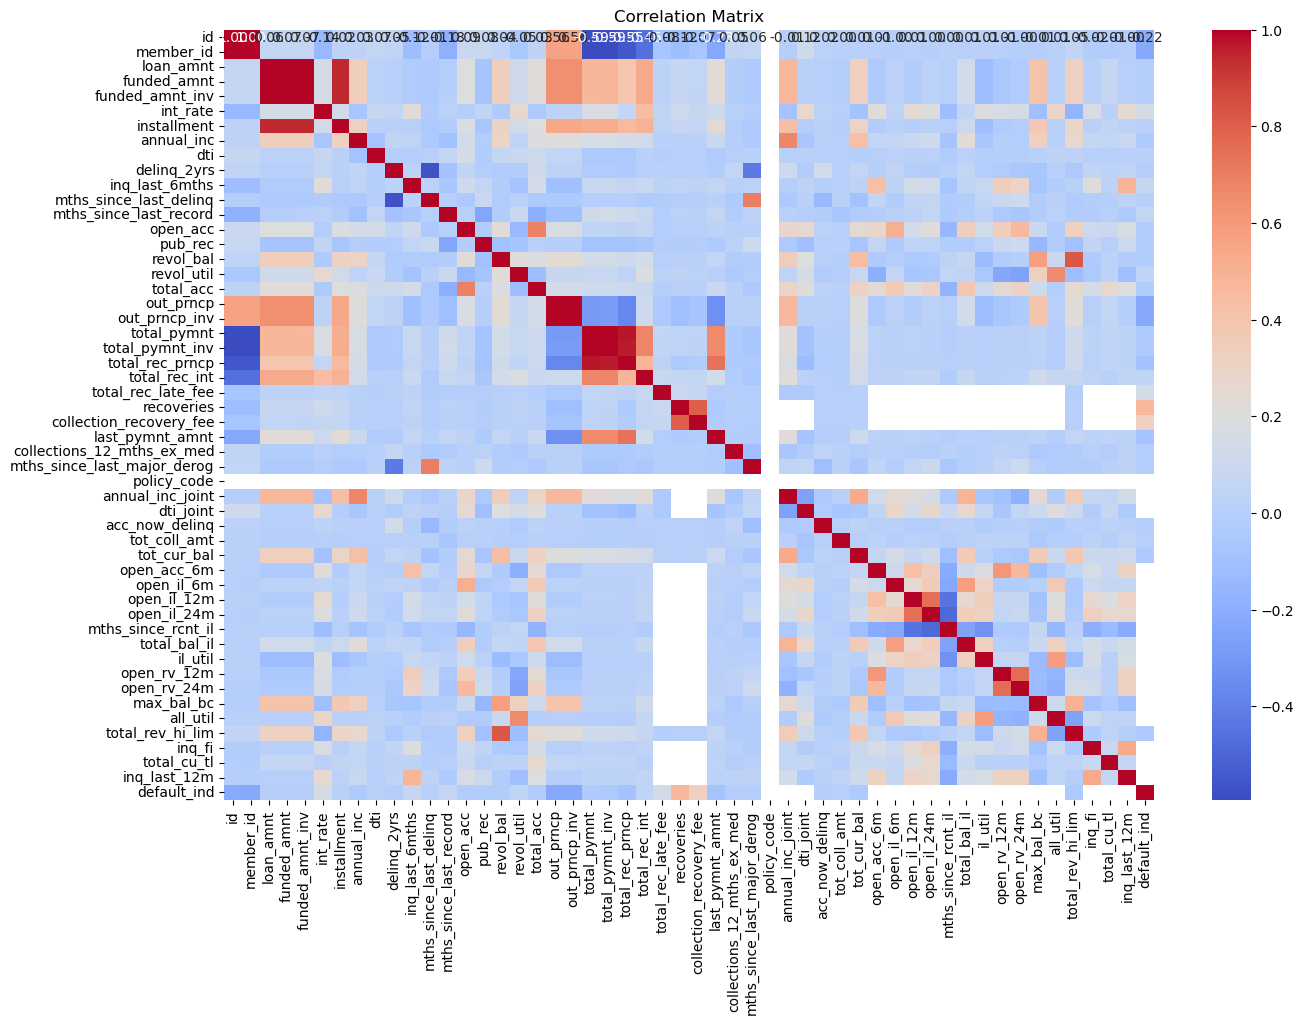

In [197]:
low_corr = corr_matrix_plot(df)

In [198]:
low_corr
#we can now drop all these columns to make our analysis a little faster 

['inq_last_6mths',
 'mths_since_last_record',
 'total_rec_int',
 'revol_util',
 'installment',
 'dti',
 'mths_since_last_delinq',
 'tot_coll_amt',
 'acc_now_delinq',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'delinq_2yrs',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'open_acc',
 'total_rev_hi_lim',
 'tot_cur_bal',
 'annual_inc',
 'total_pymnt',
 'total_pymnt_inv',
 'last_pymnt_amnt',
 'total_rec_prncp']

In [199]:

numeric_df = df.select_dtypes(include=[float, int])
X = numeric_df.drop("default_ind", axis = 1)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
threshold = 0.1
from sklearn.decomposition import PCA

pca = PCA(n_components=20)  # Specify number of components to keep
pca.fit(X_imputed)

# Get features with low explained variance ratios
low_pca_features = [X.columns[i] for i in range(len(pca.explained_variance_ratio_)) if pca.explained_variance_ratio_[i] < threshold]

In [200]:
from sklearn.impute import SimpleImputer
# total_rev_hi_lim 

# Fill missing values in total_rev_hi_lim with Simple Imputer

imputer = SimpleImputer(strategy='median')
total_rev_hi_lim = df['total_rev_hi_lim'].values.reshape(-1,1)
total_rev_hi_lim_imputed = imputer.fit_transform(total_rev_hi_lim)
df['total_rev_hi_lim'] = total_rev_hi_lim_imputed

In [201]:
low_pca_features

['member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv']

In [202]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,23800.0,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,23800.0,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,23800.0,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,23800.0,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,23800.0,NaN,NaN,NaN,0


In [203]:
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim         0
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

In [204]:
df["emp_length"].value_counts()


emp_length
10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: count, dtype: int64

In [205]:
# home_ownership 

# Remove rows with value ANY

df = df[df['home_ownership'] != 'ANY']
df['home_ownership'].unique()

# Level encoding for home ownership 

home_type = ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(home_type)

# Encode the 'grade' column in the DataFrame
df['home_ownership'] = encoder.transform(df['home_ownership'])


In [206]:
df['home_ownership']

0         4
1         4
2         4
3         4
4         4
         ..
855964    4
855965    0
855966    4
855967    4
855968    4
Name: home_ownership, Length: 855966, dtype: int32

In [207]:
encoding_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Print the encoding mapping
print("Encoding Mapping:", encoding_mapping)

Encoding Mapping: {'MORTGAGE': 0, 'NONE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4}


In [208]:
# Purpose 

# Label encoding for purpose

df['purpose'].unique()

purposes = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(purposes)
# Encode the 'grade' column in the DataFrame
df['purpose'] = encoder.transform(df['purpose'])
df['purpose'].head()

0     1
1     0
2    11
3     9
4     9
Name: purpose, dtype: int32

# What is sub_grade?

sub_grade is a more granular categorization of loan grades.
Loan grades typically range from A to G, with each letter representing a range of risk and interest rates.
Sub-grades further divide these categories, often using a number to denote finer distinctions within each letter grade.
For example, 'A1' would be a higher sub-grade within grade A than 'A5', indicating a lower risk.

In [209]:
# sub_grade

# Sort the order of subgrades and do label encoding

subgrades = ['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5']

def custom_sort_key(subgrade):
    match = re.match(r'([A-Za-z]+)(\d+)', subgrade)
    letter = match.group(1)
    number = int(match.group(2))
    
    return letter, number

sorted_subgrades = sorted(subgrades, key=custom_sort_key)

# Level encoding for sorted sub-grade 

encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(sorted_subgrades)

# Encode the 'grade' column in the DataFrame
df['sub_grade'] = encoder.transform(df['sub_grade'])

In [210]:
# employment_lengths

employment_lengths = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'nan']

label_encoder = LabelEncoder()

# Fit the LabelEncoder with unique values
label_encoder.fit(employment_lengths)

# Encode the attribute values
df['emp_length'] = label_encoder.transform(df['emp_length'])

In [211]:
# mths_since_last_delinq

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(-1)

In [212]:
# mths_since_last_record

df['mths_since_last_record'] = df['mths_since_last_record'].fillna(-1)

In [213]:
# revol_util
# Handle missing value with imputer

imputer = SimpleImputer(strategy='mean')

revol_util = df['revol_util'].values.reshape(-1,1)

revol_util_imputed = imputer.fit_transform(revol_util)

df['revol_util'] = revol_util_imputed

In [214]:
# aggregate annual_inc and annual_inc_joint

df.loc[df['application_type'] == 'JOINT', 'annual_inc'] = df.loc[df['application_type'] == 'JOINT', 'annual_inc_joint']
df = df.drop('annual_inc_joint', axis=1)

In [215]:
# dti_joint

df.loc[df['application_type'] == 'JOINT', 'dti'] = df.loc[df['application_type'] == 'JOINT', 'dti_joint']
df = df.drop('dti_joint', axis=1)

In [216]:
# verification_status_joint

df.loc[df['application_type'] == 'JOINT', 'verification_status'] = df.loc[df['application_type'] == 'JOINT', 'verification_status_joint']
df = df.drop('verification_status_joint', axis=1)

In [217]:
# term 
# Label encoding for term

term = [' 36 months', ' 60 months']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(term)

# Encode the 'grade' column in the DataFrame
df['term'] = encoder.transform(df['term'])

In [218]:
# verification_status

veri = ['Not Verified', 'Source Verified', 'Verified']  # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(veri)


df['verification_status'] = encoder.transform(df['verification_status'])

In [219]:
# pymnt_plan

plan = ['n', 'y']  # Unique values for encoding

encoder = LabelEncoder()
encoder.fit(plan)
df['pymnt_plan'] = encoder.transform(df['pymnt_plan'])

In [220]:
# application_type

type = ['INDIVIDUAL', 'JOINT'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(type)

df['application_type'] = encoder.transform(df['application_type'])

In [221]:
# initial_list_status

status = ['f', 'w'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(status)

df['initial_list_status'] = encoder.transform(df['initial_list_status'])

In [222]:
# Fill missing last credit pull
df['last_credit_pull_d'].fillna("25-07-2023", inplace=True)

In [223]:
# Credit History Length:
# Calculated as: last_credit_pull - earliest_cr_line
def date_difference(date_str1, date_str2):
    # Convert date strings to datetime objects
    date_format = "%d-%m-%Y"
    date1 = datetime.strptime(date_str1, date_format)
    date2 = datetime.strptime(date_str2, date_format)

    # Calculate the difference
    difference = date2 - date1

    # Return the difference in days
    return difference.days

df['credit_history_length'] = df.apply(lambda row: date_difference(row['earliest_cr_line'], row['last_credit_pull_d']), axis=1)

# Swap the values and column names
df['default_ind'], df['credit_history_length'] = df['credit_history_length'], df['default_ind']
df.rename(columns={'default_ind': 'credit_history_length', 'credit_history_length': 'default_ind'}, inplace=True)

In [224]:

# Drop not usable attributes 

remove_col = [
    'id',
    'member_id',
    'emp_title',
    'issue_d',
    'desc',
    'title',
    'zip_code',
    'addr_state',
    'earliest_cr_line',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'tot_coll_amt',
    'tot_cur_bal', 
    'open_acc_6m',
    'open_il_6m', 
    'open_il_12m', 
    'open_il_24m', 
    'mths_since_rcnt_il', 
    'total_bal_il', 
    'il_util', 
    'open_rv_12m' ,
    'open_rv_24m', 
    'max_bal_bc', 
    'all_util', 
    'inq_fi', 
    'total_cu_tl', 
    'inq_last_12m',
    'grade'
]
#selected after going through other cases.

df = df.drop(remove_col, axis=1)



In [225]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'application_type', 'acc_now_delinq',
       'total_rev_hi_lim', 'credit_history_length', 'default_ind'],
      dtype='object')

In [226]:
df['default_ind'].value_counts()

default_ind
0    809499
1     46467
Name: count, dtype: int64

## Model Selection And Training

In [249]:
# First let us use random Forest Classifier

#split the Data First

selected_features = [
    'collection_recovery_fee'   ,                  
    'acc_now_delinq' ,                                    
    'funded_amnt'   ,               
    'funded_amnt_inv'   ,            
    'mths_since_last_record' ,       
    'delinq_2yrs'   ,                          
    'dti'            ,              
    'mths_since_last_delinq'  ,       
    'emp_length',                      
    'pub_rec'   ,                  
    'revol_bal'    ,                                
    'credit_history_length'  ,        
    'term'   ,                       
    'home_ownership' ,                                
    'total_rev_hi_lim'  ,              
    'total_pymnt'      ,                     
    'total_pymnt_inv'  ,              
    'purpose'   ,                   
    'revol_util'   ,                 
    'total_rec_int'   ,               
    'inq_last_6mths'  ,              
    'total_rec_prncp' ,                        
    'sub_grade'        ,             
    'total_rec_late_fee'   ,          
    'int_rate'   ,                    
    'out_prncp_inv'  ,                 
    'out_prncp'   ,                       
    'recoveries'                     
]
X = df[selected_features]
y = df['default_ind']

In [250]:
y_test.value_counts()

default_ind
0    161868
1      9326
Name: count, dtype: int64

In [251]:
from imblearn.over_sampling import SMOTE

def Oversampling(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    # Instantiate the SMOTE object
    smote = SMOTE(random_state=42)
    # Perform SMOTE only on the training data
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    return X_train_balanced, X_test, y_train_balanced, y_test

In [253]:
RF_X_train_balanced, RF_X_test, RF_y_train_balanced, RF_y_test = Oversampling(X, y)

# will take 1 min to train
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=10)
rf_classifier.fit(RF_X_train_balanced, RF_y_train_balanced)

RandomForestClassifier(n_estimators=10, random_state=42)

In [254]:
RF_y_pred = rf_classifier.predict(RF_X_test)

In [255]:
RF_X2_train, RF_X2_test, RF_y2_train, RF_y2_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
rf_classifier_default = RandomForestClassifier(random_state=42, n_estimators=10)
rf_classifier_default.fit(RF_X2_train, RF_y2_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [257]:
RF_y_pred_default = rf_classifier_default.predict(RF_X2_test)

In [261]:
pd.DataFrame(RF_y_pred_default).value_counts()

0    162183
1      9011
Name: count, dtype: int64

In [264]:
pd.DataFrame(RF_y2_test).value_counts()

default_ind
0              161901
1                9293
Name: count, dtype: int64

In [ ]:
# Adjust class weights
decision_tree = DecisionTreeClassifier(max_features='sqrt', random_state=42, class_weight='balanced')
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
logistic_regression = LogisticRegression(class_weight='balanced')

# Fit the models
decision_tree.fit(RF_X2_train, RF_y2_train)
random_forest.fit(RF_X2_train, RF_y2_train)
logistic_regression.fit(RF_X2_train, RF_y2_train)

# Generate predictions
dt_y_pred = decision_tree.predict(RF_X2_test)
rf_y_pred = random_forest.predict(RF_X2_test)
lr_y_pred = logistic_regression.predict(RF_X2_test)

In [305]:
#instead of writing code always for predictions we can use this function


def evaluate_predictions(y_true, y_pred, model_name):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred, average='macro')

    # Generate the confusion matrix
    hf.make_confusion_matrix(y_true, y_pred,figsize=(6, 6))

    # Generate the classification report
    report = classification_report(y_true, y_pred, target_names=['Non-default', 'Default'], output_dict=True)

    # Create a summary table
    summary_table = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'ROC-AUC Score': [roc_auc],
        'Precision (Non-default)': [report['Non-default']['precision']],
        'Recall (Non-default)': [report['Non-default']['recall']],
        'F1-score (Non-default)': [report['Non-default']['f1-score']],
        'Precision (Default)': [report['Default']['precision']],
        'Recall (Default)': [report['Default']['recall']],
        'F1-score (Default)': [report['Default']['f1-score']],
    })

    return summary_table

,Model,Accuracy,ROC-AUC Score,Precision (Non-default),Recall (Non-default),F1-score (Non-default),Precision (Default),Recall (Default),F1-score (Default)
0,Default Model,0.997477,0.98056,0.997799,0.999537,0.998667,0.991677,0.961584,0.976399


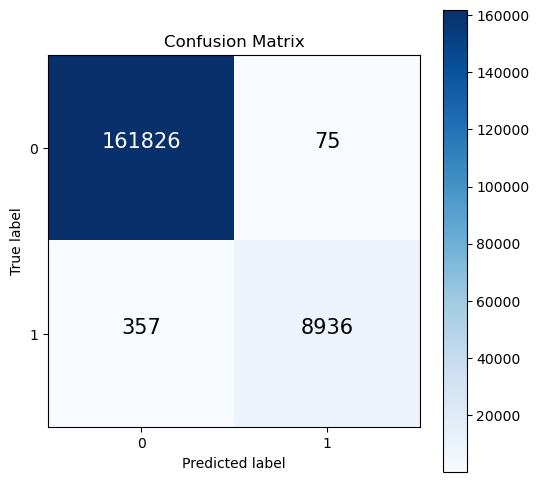

In [306]:
evaluate_predictions(RF_y2_test,RF_y_pred_default, "Default Model")

,Model,Accuracy,ROC-AUC Score,Precision (Non-default),Recall (Non-default),F1-score (Non-default),Precision (Default),Recall (Default),F1-score (Default)
0,Decision Tree,0.995093,0.974635,0.997228,0.997585,0.997406,0.957661,0.951684,0.954663


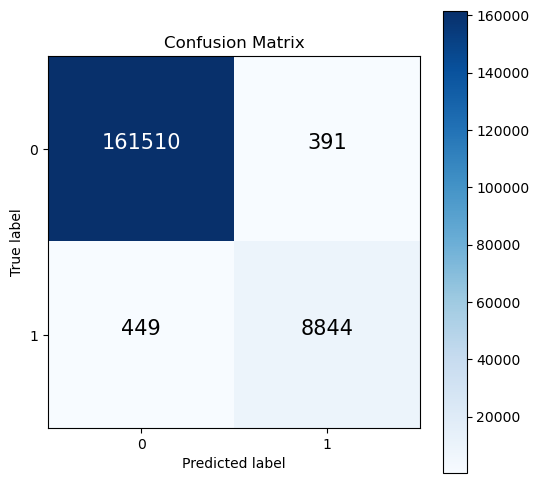

In [308]:
# Plot confusion matrices
evaluate_predictions(RF_y2_test, dt_y_pred, "Decision Tree")


,Model,Accuracy,ROC-AUC Score,Precision (Non-default),Recall (Non-default),F1-score (Non-default),Precision (Default),Recall (Default),F1-score (Default)
0,Random Forest,0.997774,0.983304,0.998113,0.999537,0.998824,0.991724,0.967072,0.979243


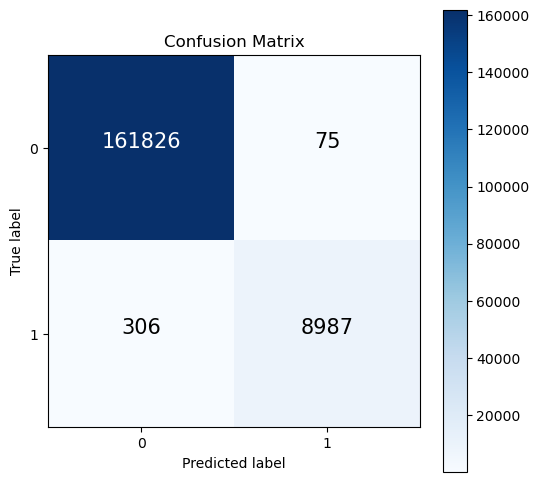

In [309]:
evaluate_predictions(RF_y2_test, rf_y_pred, "Random Forest")


,Model,Accuracy,ROC-AUC Score,Precision (Non-default),Recall (Non-default),F1-score (Non-default),Precision (Default),Recall (Default),F1-score (Default)
0,Logistic Regression,0.997582,0.984267,0.998241,0.999203,0.998722,0.985882,0.969332,0.977537


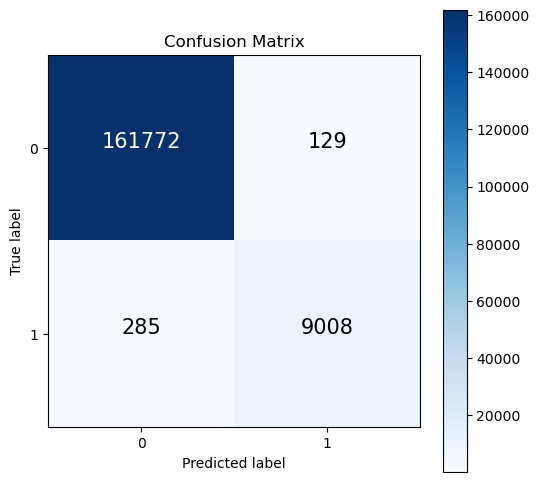

In [310]:
evaluate_predictions(RF_y2_test, lr_y_pred, "Logistic Regression")

## Let us build neural network classification model

In [315]:
RF_X3_train = tf.constant(RF_X2_train)
RF_X3_train.shape

RF_y3_train = tf.constant(RF_y2_train)

In [317]:
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(28,)),
    tf.keras.layers.Dense(5, ),
    tf.keras.layers.Dense(2, ),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#compile our model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the data to our model

model_1.fit(RF_X3_train, RF_y3_train, epochs = 5)

Epoch 1/5
21400/21400 ━━━━━━━━━━━━━━━━━━━━ 24s 949us/step - accuracy: 0.9901 - loss: 2.8079
Epoch 2/5
21400/21400 ━━━━━━━━━━━━━━━━━━━━ 20s 939us/step - accuracy: 0.9947 - loss: 0.0421
Epoch 3/5
21400/21400 ━━━━━━━━━━━━━━━━━━━━ 20s 951us/step - accuracy: 0.9952 - loss: 0.0415
Epoch 4/5
21400/21400 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.9953 - loss: 0.0374
Epoch 5/5
21400/21400 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.9948 - loss: 0.0354


In [322]:
y_preds_n1 = model_1.predict(tf.constant(RF_X2_test))

y_pred_binary = (y_preds_n1 >= 0.5).astype(int)

5350/5350 ━━━━━━━━━━━━━━━━━━━━ 4s 767us/step


In [323]:
y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

,Model,Accuracy,ROC-AUC Score,Precision (Non-default),Recall (Non-default),F1-score (Non-default),Precision (Default),Recall (Default),F1-score (Default)
0,Neural Classification-1,0.99448,0.952503,0.994598,0.999592,0.997089,0.992217,0.905413,0.946829


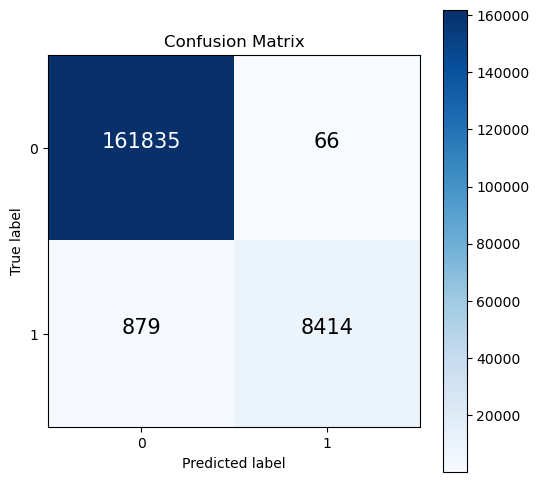

In [324]:
evaluate_predictions(RF_y2_test, y_pred_binary, "Neural Classification-1")